<a href="https://colab.research.google.com/github/IgorB99/Pokemon_Battle/blob/master/Pokemon_Colab_Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class Pokemon():
  def __init__(self, name, hp, attack, defense, special_attack, special_defense, speed, url):
    self.name = name
    self.hp = hp
    self.attack = attack
    self.defense = defense
    self.special_attack = special_attack
    self.special_defense = special_defense
    self.speed = speed
    self.url = url


Choose your pokemon: pikachu
Choose your opponent pokemon: rattata


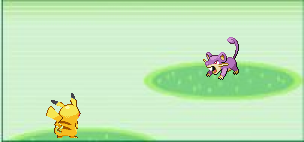

pikachu use attack or special_attack (1/2): 1
rattata use attack or special_attack (1/2): 1
pikachu's hp: 35.00, rattata's hp: -1.43

pikachu win


In [22]:
import requests
import cv2
import numpy as np
from IPython.display import Image
import urllib

#identificar pokemon
base_api_url = 'https://pokeapi.co/api/v2/pokemon?limit=151'
dados_brutos = requests.get(base_api_url)

def quem_e_esse_pokemon(pokemon, n):
  if n == 1:
    sprites = "back_default"
  else:
    sprites = "front_default"
  if dados_brutos.status_code >= 200 and dados_brutos.status_code < 300:
    for informacao in dados_brutos.json()["results"]:
      if informacao["name"] == pokemon:
        dados_brutos_pokemon = requests.get(informacao["url"])
        if dados_brutos_pokemon.status_code >= 200 and dados_brutos_pokemon.status_code < 300:
          pokemon_data = dados_brutos_pokemon.json()
          pokemon = Pokemon(name = pokemon_data["name"],
                            hp = pokemon_data["stats"][0]["base_stat"],
                            attack = pokemon_data["stats"][1]["base_stat"],
                            defense = pokemon_data["stats"][2]["base_stat"],
                            special_attack = pokemon_data["stats"][3]["base_stat"],
                            special_defense = pokemon_data["stats"][4]["base_stat"],
                            speed = pokemon_data["stats"][5]["base_stat"],
                            url = pokemon_data["sprites"][sprites])
  return pokemon

#calculo de dano
def pokemon_acao(acao, n):
  if n == 1:
    if acao == 1:
      dano = ((pokemon1.attack * 2) / pokemon2.defense) * 10
    else:
      dano = ((pokemon1.special_attack * 2) / pokemon2.special_defense) * 10
  else:
    if acao == 1:
      dano = ((pokemon2.attack * 2) / pokemon1.defense) * 10
    else:
      dano = ((pokemon2.special_attack * 2) / pokemon1.special_defense) * 10
  return dano

#colocar os pokemon no campo
def campo(url, x, y):
  url_request = urllib.request.urlopen(url)
  img_array = np.array(bytearray(url_request.read()), dtype=np.uint8)
  img = cv2.imdecode(img_array, -1)
  height, width, bytesByPixel = np.shape(img)

  for py in range(height):
    for px in range(width):
      if (img[py][px][0] == 0 and img[py][px][1] == 0 and img[py][px][2] == 0) or (py + y) > 140:
        continue
      fundo[py + y][px + x][0] = img[py][px][0]
      fundo[py + y][px + x][1] = img[py][px][1]
      fundo[py + y][px + x][2] = img[py][px][2]

#escolher pokemon
pokemon1 = input("Choose your pokemon: ")
pokemon2 = input("Choose your opponent pokemon: ")

pokemon1 = quem_e_esse_pokemon(pokemon1, 1)
pokemon2 = quem_e_esse_pokemon(pokemon2, 2)

#redimensionar o fundo
img_fundo = cv2.imread("fundo.JPG")
altura = int(img_fundo.shape[1] * 150 / 100)
largura = int(img_fundo.shape[0] * 150 / 100)
dim = (altura, largura)
fundo = cv2.resize(img_fundo, dim, interpolation = cv2.INTER_AREA)

#criar o campo
campo(pokemon1.url, 20, 70)
campo(pokemon2.url, 175, 15)

cv2.imwrite("battle.png", fundo)
battle = "battle.png"
display(Image(battle))

#batalha
while pokemon1.hp > 0 and pokemon2.hp > 0:
  pokemon1_acao = int(input(pokemon1.name + " use attack or special_attack (1/2): "))
  pokemon2_acao = int(input(pokemon2.name + " use attack or special_attack (1/2): "))

  if pokemon1.speed > pokemon2.speed:
    pokemon2.hp -= pokemon_acao(pokemon1_acao, 1)
    if pokemon2.hp > 0:
      pokemon1.hp -= pokemon_acao(pokemon2_acao, 2)
    print("{}'s hp: {:.2f}, {}'s hp: {:.2f}\n".format(pokemon1.name, pokemon1.hp, pokemon2.name, pokemon2.hp))
  else:
    pokemon1.hp -= pokemon_acao(pokemon2_acao, 2)
    if pokemon1.hp > 0:
      pokemon2.hp -= pokemon_acao(pokemon1_acao, 1)
    print("{}'s hp: {:.2f}, {}'s hp: {:.2f}\n".format(pokemon1.name, pokemon1.hp, pokemon2.name, pokemon2.hp))

#resultado da batalha
if pokemon1.hp > pokemon2.hp:
  print(pokemon1.name + " win")
else:
  print(pokemon2.name + " win")